In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 한글
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [6]:
data = pd.read_csv('htn_dm2.csv')
data.head()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
0,1,1,116,78,94,4,16.6,38,0,0
1,1,1,100,60,79,4,22.3,40,0,0
2,1,1,100,60,87,4,21.9,40,0,0
3,1,1,111,70,72,4,20.2,41,0,0
4,1,1,120,80,98,4,20.0,40,0,0


In [7]:
data.describe()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
count,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000,968773.000000
mean,1.493249,13.784925,121.490500,75.635854,96.062496,3.505435,23.753688,45.854646,0.208092,0.078381
std,0.499955,7.003660,14.204485,9.654136,14.298098,0.917648,3.266635,9.468919,0.405943,0.268770
min,1.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000,10.000000,0.000000,0.000000
25%,1.000000,9.000000,110.000000,70.000000,87.000000,4.000000,21.500000,40.000000,0.000000,0.000000
50%,1.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.500000,45.000000,0.000000,0.000000
75%,2.000000,19.000000,130.000000,80.000000,102.000000,4.000000,25.800000,50.000000,0.000000,0.000000
max,2.000000,27.000000,190.000000,110.000000,155.000000,4.000000,38.700000,80.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968773 entries, 0 to 968772
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sex     968773 non-null  int64  
 1   age     968773 non-null  int64  
 2   sbp     968773 non-null  int64  
 3   dbp     968773 non-null  int64  
 4   fbs     968773 non-null  int64  
 5   dis     968773 non-null  int64  
 6   bmi     968773 non-null  float64
 7   ppr     968773 non-null  int64  
 8   htn     968773 non-null  int64  
 9   dm      968773 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 73.9 MB


### 1. 공복혈당과의 관계

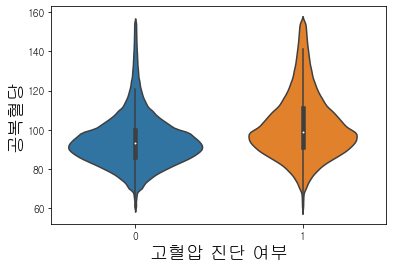

In [9]:
sns.violinplot(x="htn", y="fbs", data=data)
plt.xlabel('고혈압 진단 여부',size=18)
plt.ylabel('공복혈당', size = 18)
plt.savefig('fbs_violin.png')

Text(0, 0.5, '공복혈당')

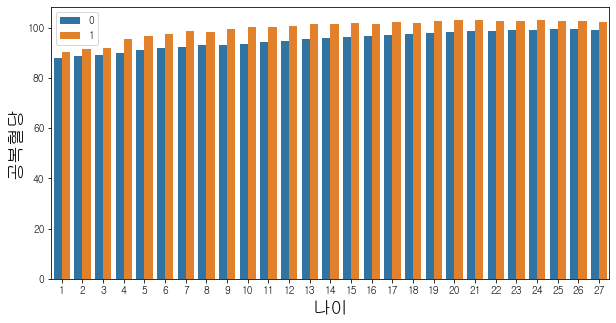

In [13]:
# 나이, 고혈압 진단 여부에 따른 공복혈당의 평균

df_fbs = pd.DataFrame(data.groupby(['age','htn'], as_index = False)['fbs'].mean())

plt.figure(figsize = (10,5))
sns.barplot(data=df_fbs, x = 'age', y = 'fbs', hue = 'htn')
plt.legend(loc = 'upper left')
plt.xlabel('나이',size=18)
plt.ylabel('공복혈당', size = 18)
#plt.savefig('age_fbs_mean.png')

C:\Users\LSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


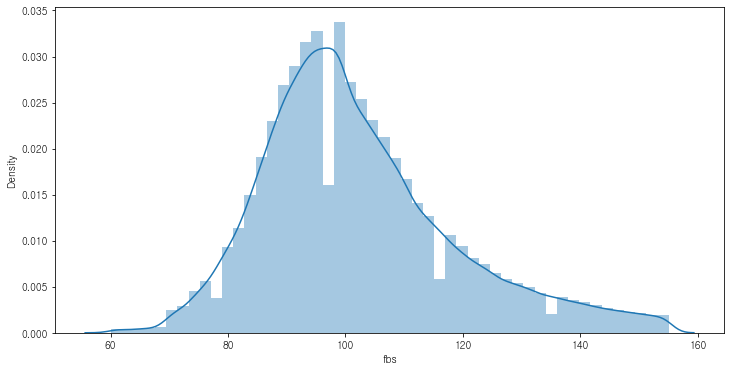

In [14]:
# 고혈압진단을 받은 사람들의 공복혈당 분포도

df_htn1 = data[data['htn']==1]
df_htn0 = data[data['htn']==0]

plt.figure(figsize = (12,6))
sns.distplot(df_htn1.fbs, hist = True, kde = True)
plt.show()

C:\Users\LSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


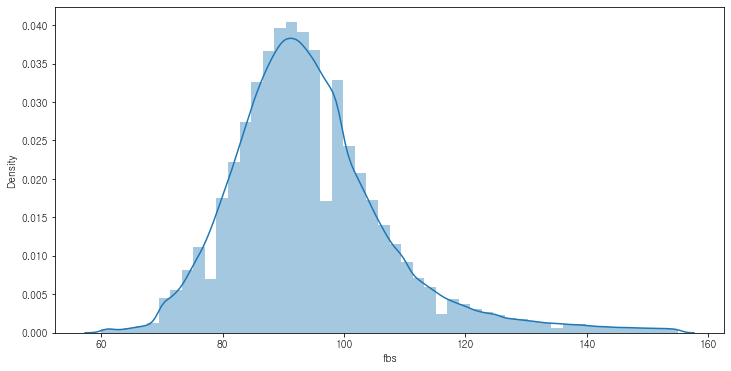

In [16]:
# 고혈압진단을 받지 않은 사람들의 공복혈당 분포도

plt.figure(figsize = (12,6))
sns.distplot(df_htn0.fbs, hist = True, kde = True)
plt.show()

### 2. 맥압과의 관계

Text(0, 0.5, '맥압')

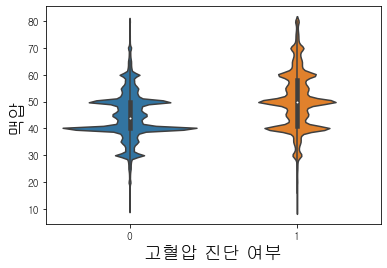

In [17]:
sns.violinplot(x="htn", y="ppr", data=data)
plt.xlabel('고혈압 진단 여부',size=18)
plt.ylabel('맥압', size = 18)
#plt.savefig('bmi_violin.png')

<AxesSubplot:xlabel='htn', ylabel='ppr'>

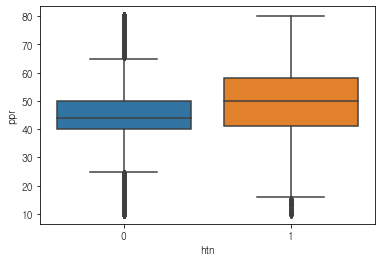

In [18]:
sns.boxplot(x = 'htn', y = 'ppr', data= data)

Text(0, 0.5, '맥압')

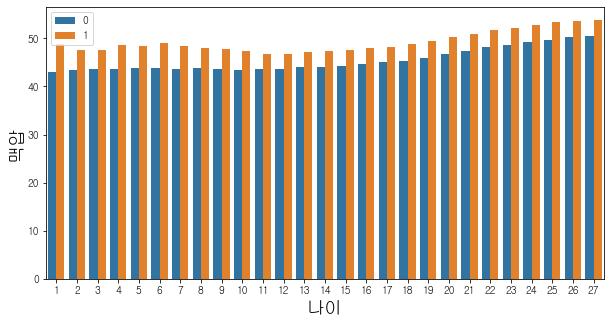

In [19]:
# 나이, 고혈압 진단 여부에 따른 ppr의 평균

df_fbs = pd.DataFrame(data.groupby(['age','htn'], as_index = False)['ppr'].mean())

plt.figure(figsize = (10,5))
sns.barplot(data=df_fbs, x = 'age', y = 'ppr', hue = 'htn')
plt.legend(loc = 'upper left')
plt.xlabel('나이',size=18)
plt.ylabel('맥압', size = 18)
#plt.savefig('age_ppr_mean.png')

### 3. 체질량지수와의 관계

Text(0, 0.5, '체질량지수')

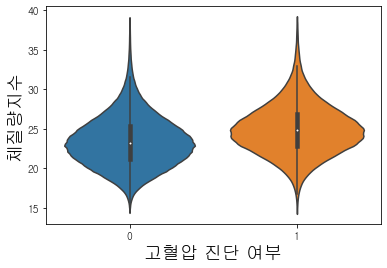

In [20]:
sns.violinplot(x="htn", y="bmi", data=data)
plt.xlabel('고혈압 진단 여부',size=18)
plt.ylabel('체질량지수', size = 18)
#plt.savefig('bmi_violin.png')

Text(0, 0.5, '체질량지수')

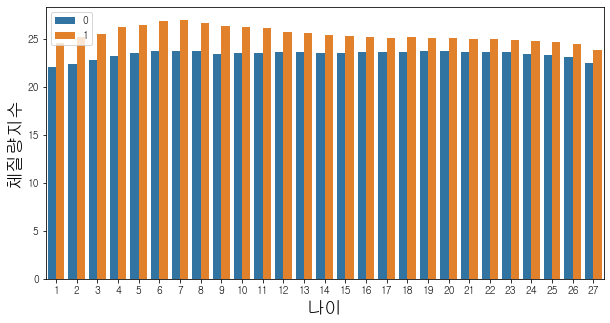

In [21]:
# 나이, 고혈압 진단 여부에 따른 bmi의 평균

df_fbs = pd.DataFrame(data.groupby(['age','htn'], as_index = False)['bmi'].mean())

plt.figure(figsize = (10,5))
sns.barplot(data=df_fbs, x = 'age', y = 'bmi', hue = 'htn')
plt.legend(loc = 'upper left')
plt.xlabel('나이',size=18)
plt.ylabel('체질량지수', size = 18)
#plt.savefig('age_bmi_mean.png')

### 4. 성별과의 관계

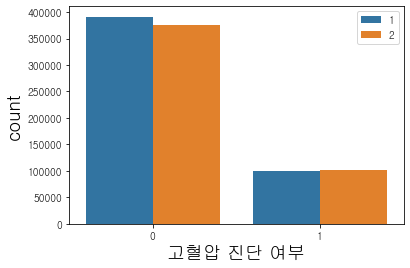

In [22]:
sns.countplot(x='htn', hue='sex',data=data)
plt.legend(loc = 'upper right')
plt.xlabel('고혈압 진단 여부',size=18)
plt.ylabel('count', size = 18)
#plt.savefig('성별_고혈압.png')
plt.show()

### 5. 나이와의 관계

In [24]:
# 나이에 따른 고혈압환자의 비율

df_age = pd.DataFrame(data.groupby(['age','htn'], as_index = False)['age'].count())

age_htn_list = []

for i in range(1,28):
    data_age = data.loc[data['age']==i]
    age_value = pd.DataFrame(data_age['htn'].value_counts())
    htn0 = age_value['htn'][0]
    htn1 = age_value['htn'][1]
    htn_per = np.round(htn1/(htn1+htn0),2)
    age_htn_list.append(htn_per)
    #print('나이범위 {}의 고혈압환자 비율 = {}'.format(i, htn_per))

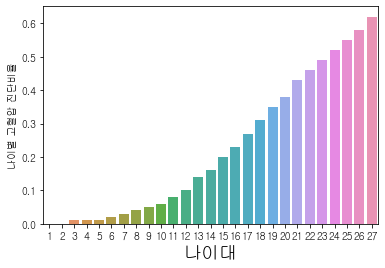

In [26]:
age_series = pd.Series(range(1,28))
list_series = pd.Series(age_htn_list)
age_per = pd.concat([age_series, list_series], axis=1)

sns.barplot(x = 0, y = 1, data = age_per)
plt.xlabel('나이대',size=18)
plt.ylabel('나이별 고혈압 진단비율', size = 10)
#plt.savefig('나이별고혈압진단비율1.png')
plt.show()